## Import all your models

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

## Reading Data

use the pandas dataframe to read your data from disk

In [2]:
health_data = pd.read_csv("../data/Life Expectancy Data.csv")

health_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Analyzing Data

Analyze the data to see the number missing values

In [3]:
health_data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

> we need to see the columns which are categorical and numerical 

now looking at the **output** of the ```health_data.describe()``` function any value where the ***unique*** row has a value shows that column is a categorical data and the rest are numerical

In [4]:
health_data.describe(include="all")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [5]:
country_num = health_data["Country"].unique()

na_cols = health_data.columns[health_data.isnull().any()].tolist()

for cols in na_cols:
    for country in country_num:
        health_data.loc[health_data["Country"] == country, cols] = health_data.loc[health_data["Country"] == country, cols].fillna(health_data[health_data["Country"] == country][cols].mean())

In [6]:
health_data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
feature_num = health_data.select_dtypes(include=["int", "int32", "int64", "float", "float32", "float64"]).columns

feature_cat = health_data.select_dtypes(include=["object"]).columns

mean_impute_num = SimpleImputer(strategy="mean")

health_data[feature_num] = mean_impute_num.fit_transform(health_data[feature_num])

<function matplotlib.pyplot.show(close=None, block=None)>

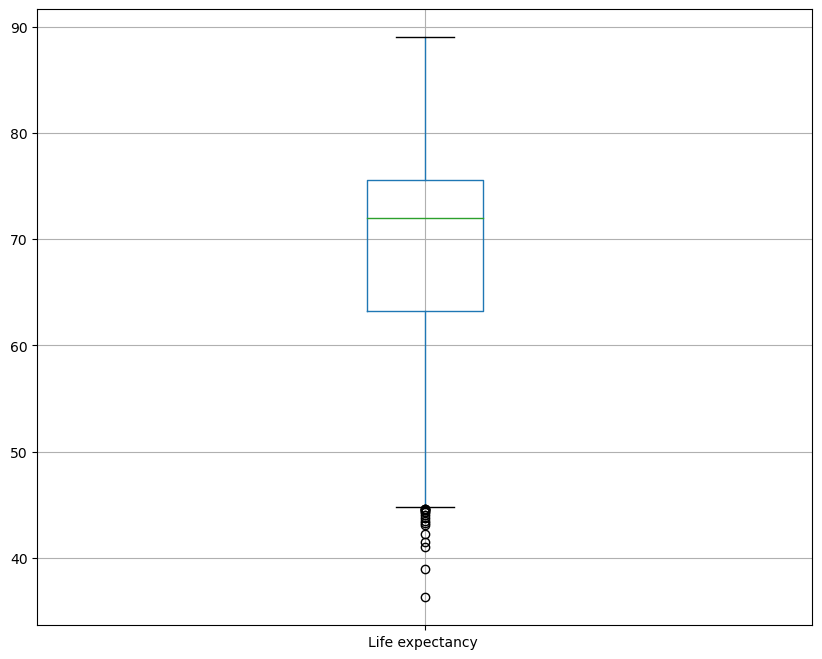

In [8]:
plt.figure(figsize=[10, 8])

health_data.boxplot('Life expectancy ')

plt.show

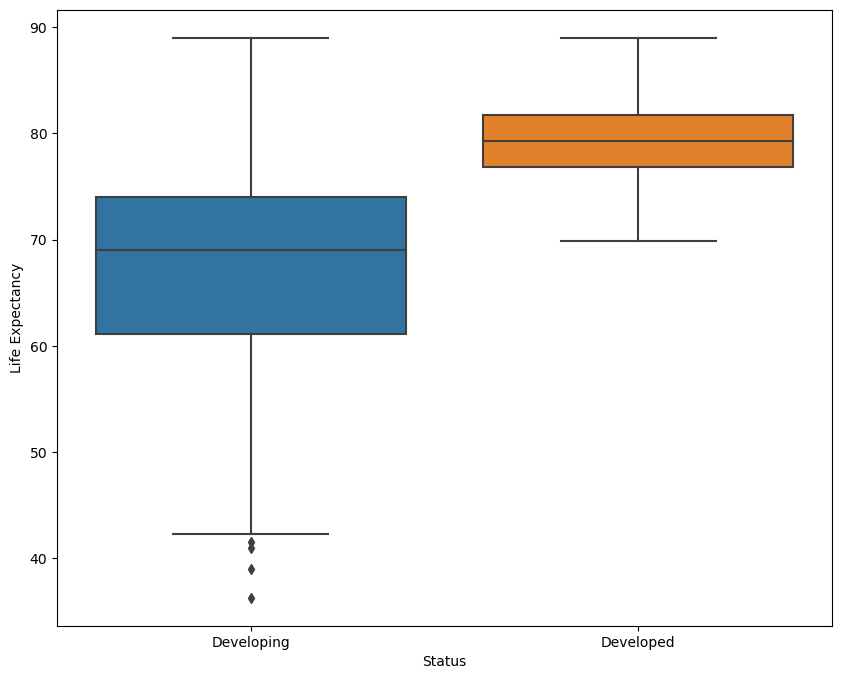

In [9]:
plt.figure(figsize=[10, 8])

sns.boxplot(data=health_data, x="Status", y="Life expectancy ")

plt.xlabel("Status")
plt.ylabel("Life Expectancy")

plt.show()

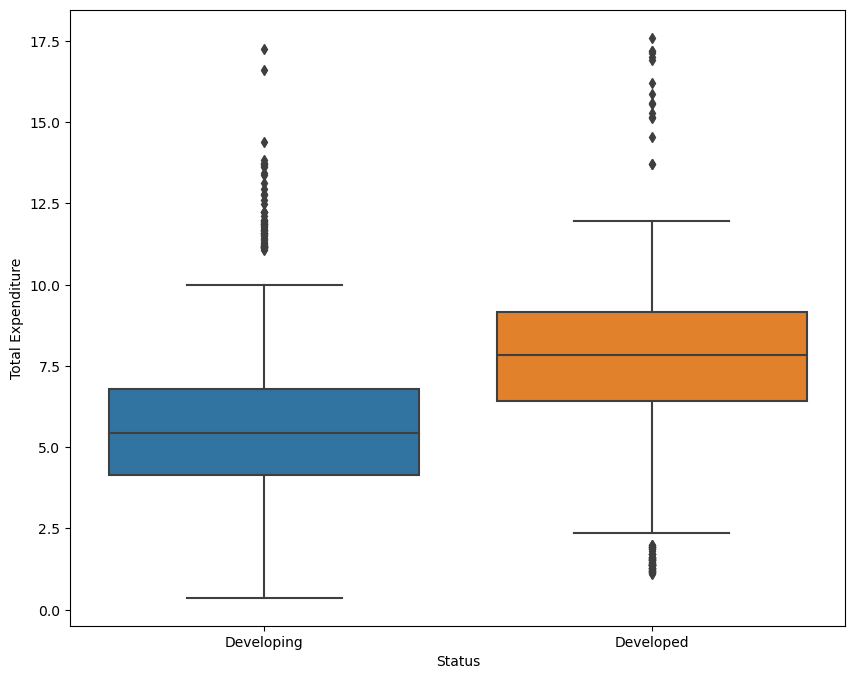

In [10]:
plt.figure(figsize=[10, 8])

sns.boxplot(data=health_data, x="Status", y="Total expenditure")

plt.xlabel("Status")
plt.ylabel("Total Expenditure")

plt.show()

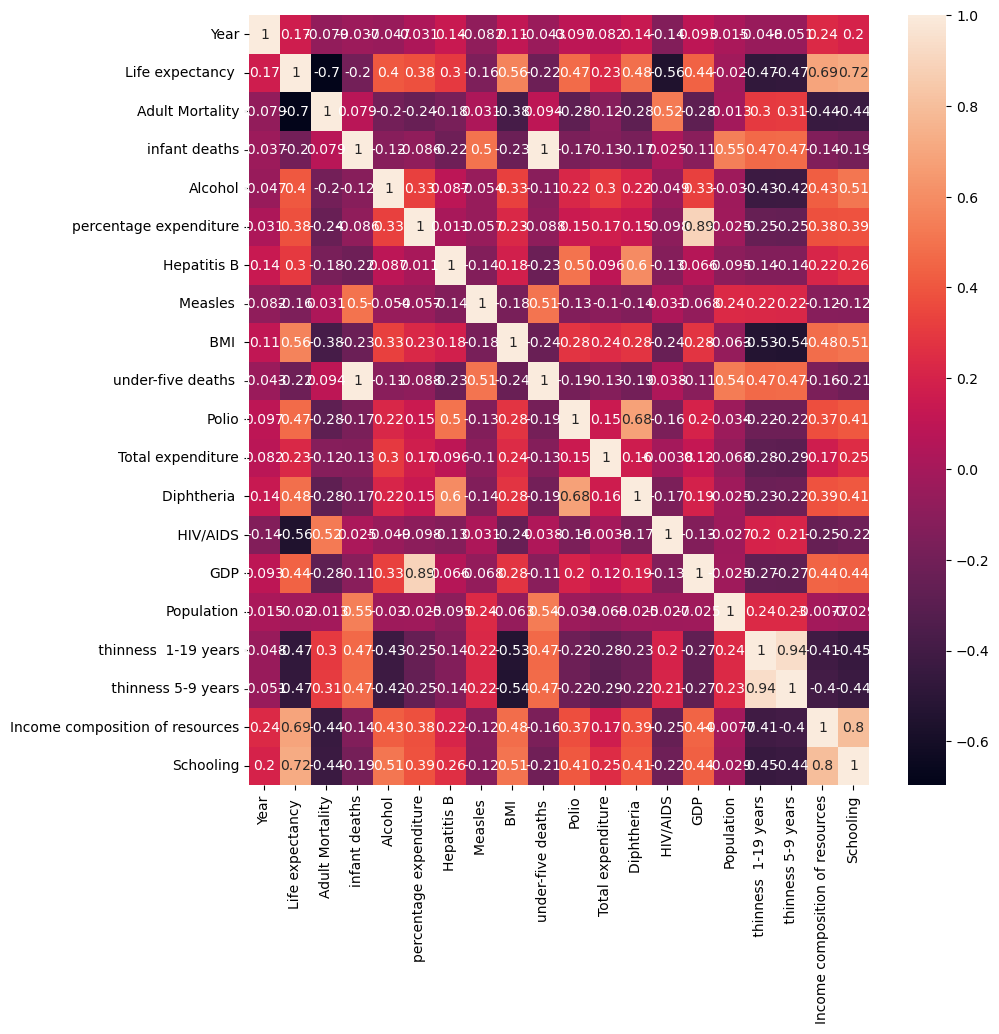

In [11]:
data_cor = health_data[feature_num].corr()

plt.figure(figsize=[10, 10])

sns.heatmap(data=data_cor, annot=True)

plt.show()

In [12]:
features = health_data.drop("Life expectancy ", axis=1)

target = health_data[["Life expectancy "]]

In [13]:
features = features.drop("Country", axis=1)

In [14]:
features_cat = pd.get_dummies(features["Status"])

In [15]:
features.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015.0,Developing,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014.0,Developing,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013.0,Developing,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012.0,Developing,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011.0,Developing,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
features_cat.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [17]:
features = features.drop("Status", axis=1)
sc = StandardScaler()

features = pd.DataFrame(sc.fit_transform(features), columns=features.columns, index=features.index)

features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,0.791586,0.268824,-1.140132,-0.335570,-0.555829,-0.110384,-0.964715,0.255359,-3.254773,0.911904,-0.723865,-0.323445,-0.516411,0.390311,2.813130,2.773279,-0.725401,-0.579931
1,1.404986,0.856072,0.285786,-1.140132,-0.334441,-0.678006,-0.168124,-0.989810,0.274060,-1.039374,0.920050,-0.850238,-0.323445,-0.514250,-0.230583,2.881408,2.817902,-0.740050,-0.610570
2,1.188210,0.831890,0.302749,-1.140132,-0.334594,-0.596555,-0.173531,-1.014905,0.292761,-0.868959,0.899686,-0.765989,-0.323445,-0.512802,0.353053,2.926927,2.862526,-0.769349,-0.641209
3,0.971434,0.864132,0.328193,-1.140132,-0.332096,-0.474378,0.032045,-1.040000,0.317696,-0.655940,1.058524,-0.639616,-0.323445,-0.509897,-0.167964,2.972446,2.929461,-0.803531,-0.671847
4,0.754658,0.888314,0.345155,-1.140132,-0.367862,-0.433652,0.051757,-1.060076,0.342631,-0.613336,0.793794,-0.597491,-0.323445,-0.555990,-0.181314,3.040724,2.974085,-0.847480,-0.763764


In [18]:
processed_features = pd.concat([features, features_cat], axis=1, sort=False)

processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.621762,0.791586,0.268824,-1.140132,-0.335570,-0.555829,-0.110384,-0.964715,0.255359,-3.254773,...,-0.723865,-0.323445,-0.516411,0.390311,2.813130,2.773279,-0.725401,-0.579931,0,1
1,1.404986,0.856072,0.285786,-1.140132,-0.334441,-0.678006,-0.168124,-0.989810,0.274060,-1.039374,...,-0.850238,-0.323445,-0.514250,-0.230583,2.881408,2.817902,-0.740050,-0.610570,0,1
2,1.188210,0.831890,0.302749,-1.140132,-0.334594,-0.596555,-0.173531,-1.014905,0.292761,-0.868959,...,-0.765989,-0.323445,-0.512802,0.353053,2.926927,2.862526,-0.769349,-0.641209,0,1
3,0.971434,0.864132,0.328193,-1.140132,-0.332096,-0.474378,0.032045,-1.040000,0.317696,-0.655940,...,-0.639616,-0.323445,-0.509897,-0.167964,2.972446,2.929461,-0.803531,-0.671847,0,1
4,0.754658,0.888314,0.345155,-1.140132,-0.367862,-0.433652,0.051757,-1.060076,0.342631,-0.613336,...,-0.597491,-0.323445,-0.555990,-0.181314,3.040724,2.974085,-0.847480,-0.763764,0,1


In [19]:
processed_features.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.376588e-14,1.000170,-1.629878,-0.762774,0.104330,9.714341e-01,1.621762
Adult Mortality,2938.0,-1.499443e-16,1.000170,-1.320309,-0.731880,-0.167633,5.014022e-01,4.499494
infant deaths,2938.0,-1.934766e-17,1.000170,-0.257017,-0.257017,-0.231573,-7.042829e-02,15.009326
Alcohol,2938.0,4.836914e-18,1.000170,-1.140132,-0.911651,-0.203857,7.640828e-01,3.295379
percentage expenditure,2938.0,5.078760e-17,1.000170,-0.371433,-0.369076,-0.338774,-1.492859e-01,9.429403
Hepatitis B,2938.0,-2.551472e-16,1.000170,-3.162276,-0.209661,0.380863,7.066684e-01,0.828846
Measles,2938.0,-7.255372e-18,1.000170,-0.211036,-0.211036,-0.209553,-1.796149e-01,18.295468
BMI,2938.0,2.684488e-16,1.000170,-1.873154,-0.949658,0.234827,8.923158e-01,2.458244
under-five deaths,2938.0,4.836914e-18,1.000170,-0.262038,-0.262038,-0.237104,-8.749465e-02,15.322224
Polio,2938.0,-1.172952e-16,1.000170,-3.382585,-0.187298,0.451760,6.221749e-01,0.707383


In [41]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, target, random_state=0, test_size=0.2)

In [226]:
model = keras.Sequential(
    [
        layers.Dense(64, input_shape=[X_train.shape[1]], activation="sigmoid"),
        layers.Dense(1)
    ]
)
    
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    
model.compile(optimizer=optimizer, loss="mse", metrics=["mse", "mae"])
    

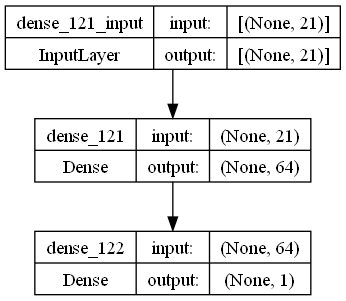

In [227]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [220]:
X_train.shape, y_train.shape

((2350, 21), (2350, 1))

In [228]:
th = model.fit(X_train, y_train, validation_split=0.2, verbose=True, epochs=100)

Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 4742.5654 - mse: 4742.5654 - mae: 68.2264 - val_loss: 4531.3232 - val_mse: 4531.3232 - val_mae: 66.6907
Epoch 2/100
59/59 [==============================] - 0s 4ms/step - loss: 4426.3174 - mse: 4426.3174 - mae: 65.9310 - val_loss: 4229.3057 - val_mse: 4229.3057 - val_mae: 64.4484
Epoch 3/100
59/59 [==============================] - 0s 4ms/step - loss: 4122.0151 - mse: 4122.0151 - mae: 63.6338 - val_loss: 3932.1204 - val_mse: 3932.1204 - val_mae: 62.1542
Epoch 4/100
59/59 [==============================] - 0s 4ms/step - loss: 3821.7251 - mse: 3821.7251 - mae: 61.2767 - val_loss: 3635.4492 - val_mse: 3635.4492 - val_mae: 59.7714
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 3519.2192 - mse: 3519.2192 - mae: 58.8030 - val_loss: 3333.0505 - val_mse: 3333.0505 - val_mae: 57.2321
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 3208.8679 - mse: 3208.8679 - mae: 56.1427 

Epoch 49/100
59/59 [==============================] - 0s 3ms/step - loss: 11.4921 - mse: 11.4921 - mae: 2.5190 - val_loss: 11.6046 - val_mse: 11.6046 - val_mae: 2.5200
Epoch 50/100
59/59 [==============================] - 0s 3ms/step - loss: 11.3547 - mse: 11.3547 - mae: 2.5077 - val_loss: 11.5525 - val_mse: 11.5525 - val_mae: 2.5117
Epoch 51/100
59/59 [==============================] - 0s 4ms/step - loss: 11.2069 - mse: 11.2069 - mae: 2.4860 - val_loss: 11.5139 - val_mse: 11.5139 - val_mae: 2.5117
Epoch 52/100
59/59 [==============================] - 0s 3ms/step - loss: 11.0699 - mse: 11.0699 - mae: 2.4716 - val_loss: 11.3798 - val_mse: 11.3798 - val_mae: 2.4902
Epoch 53/100
59/59 [==============================] - 0s 3ms/step - loss: 10.9531 - mse: 10.9531 - mae: 2.4609 - val_loss: 11.2018 - val_mse: 11.2018 - val_mae: 2.4748
Epoch 54/100
59/59 [==============================] - 0s 4ms/step - loss: 10.8185 - mse: 10.8185 - mae: 2.4393 - val_loss: 11.0994 - val_mse: 11.0994 - val_mae:

59/59 [==============================] - 0s 4ms/step - loss: 7.4882 - mse: 7.4882 - mae: 1.9853 - val_loss: 8.5425 - val_mse: 8.5425 - val_mae: 2.1043
Epoch 99/100
59/59 [==============================] - 0s 4ms/step - loss: 7.4340 - mse: 7.4340 - mae: 1.9911 - val_loss: 8.5366 - val_mse: 8.5366 - val_mae: 2.0982
Epoch 100/100
59/59 [==============================] - 0s 4ms/step - loss: 7.3888 - mse: 7.3888 - mae: 1.9754 - val_loss: 8.5759 - val_mse: 8.5759 - val_mae: 2.1052


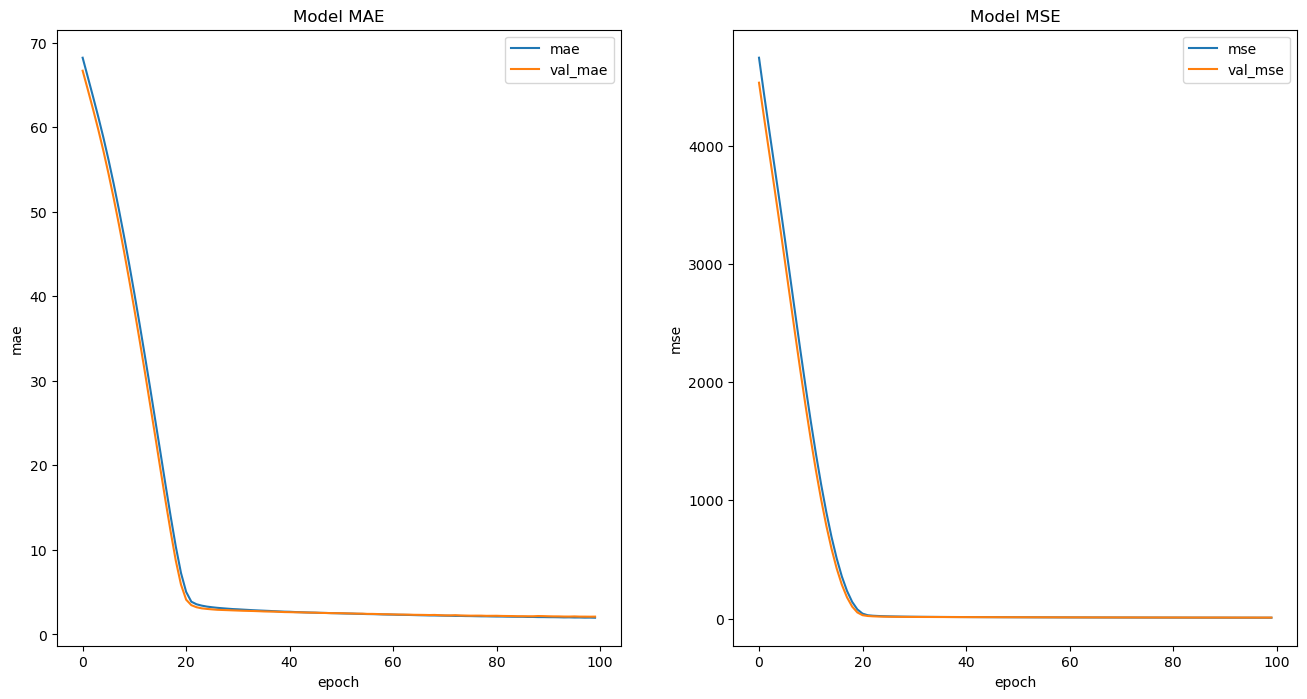

In [229]:
plt.figure(figsize=[16, 8])

plt.subplot(1, 2, 1)

plt.plot(th.history["mae"])
plt.plot(th.history["val_mae"])

plt.title("Model MAE")
plt.xlabel("epoch")
plt.ylabel("mae")
plt.legend(["mae", "val_mae"])

plt.subplot(1, 2, 2)

plt.plot(th.history["mse"])
plt.plot(th.history["val_mse"])

plt.title("Model MSE")
plt.xlabel("epoch")
plt.ylabel("mse")
plt.legend(["mse", "val_mse"])

plt.show()

In [230]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 8.3037 - mse: 8.3037 - mae: 2.0740


[8.303719520568848, 8.303719520568848, 2.0740225315093994]

In [231]:
y_pred = model.predict(X_test)

r2_score(y_true=y_test, y_pred=y_pred)

19/19 [==============================] - 0s 2ms/step


0.9087919020167972

In [232]:
pred_result = pd.DataFrame({"y_true": y_test.values.flatten(),
                           "y_pred": y_pred.flatten()}, index=range(len(y_pred)))

pred_result.sample(10)

,y_true,y_pred
16,59.3,56.433762
40,59.7,57.799477
64,62.6,58.858681
378,74.9,72.567795
484,78.0,78.163940
482,73.7,73.154953
309,55.1,55.656208
18,73.0,70.636131
116,71.2,72.867317
351,52.6,54.292759
